<a href="https://colab.research.google.com/github/phillnatt/exercise-performance-insights/blob/main/ExerciseInsightsipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load Data

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/Exercise.csv')

# Preview the data
df.head()

Mounted at /content/drive


,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


In [ ]:
# Clean The Data

# Drop unnamed index column if present
df.drop(columns=[col for col in df.columns if 'Unnamed' in col], inplace=True)

# Create new feature: Weight Difference
df['Weight_Diff'] = df['Dream Weight'] - df['Actual Weight']

# Create Age Groups
df['Age_Group'] = pd.cut(df['Age'], bins=[17, 30, 45, 60], labels=['18-30', '31-45', '46-60'])


# Encode Exercise Intensity as categorical
def encode_intensity(val):
    if val <= 3:
        return 'Low'
    elif val <= 7:
        return 'Medium'
    else:
        return 'High'
df['Intensity_Level'] = df['Exercise Intensity'].apply(encode_intensity)

from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for col in ['Gender', 'Weather Conditions', 'Exercise', 'Intensity_Level']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Preview the data
df.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity,Weight_Diff,Age_Group,Intensity_Level
0,1,2,286.959851,91.892531,96.301115,45,1,37,170,29.426275,1,5,-4.408585,31-45,2
1,2,7,343.453036,64.165097,61.104668,25,1,43,142,21.286346,1,5,3.060429,18-30,2
2,3,4,261.223465,70.846224,71.766724,20,1,20,148,27.899592,0,4,-0.920500,18-30,2
3,4,5,127.183858,79.477008,82.984456,33,1,39,170,33.729552,2,10,-3.507448,31-45,0
4,5,1,416.318374,89.960226,85.643174,29,0,34,118,23.286113,0,3,4.317052,18-30,1


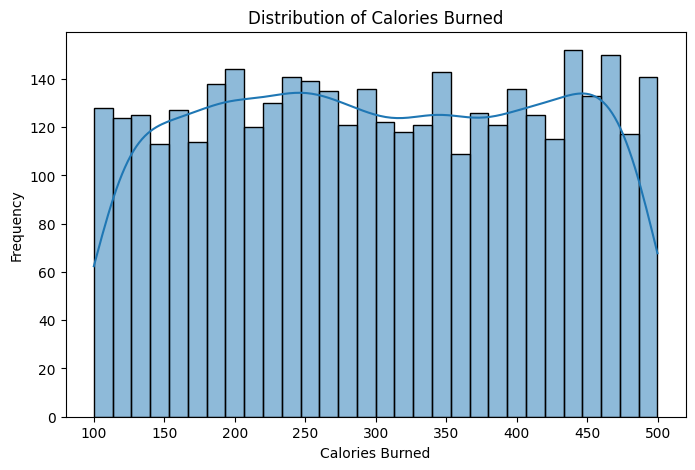

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt # Import pyplot

# ------------------ Exploratory Data Analysis ------------------

# Histogram of Calories Burned
plt.figure(figsize=(8, 5))
sns.histplot(df['Calories Burn'], bins=30, kde=True)
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.savefig('eda_calories_distribution.png')
plt.show()

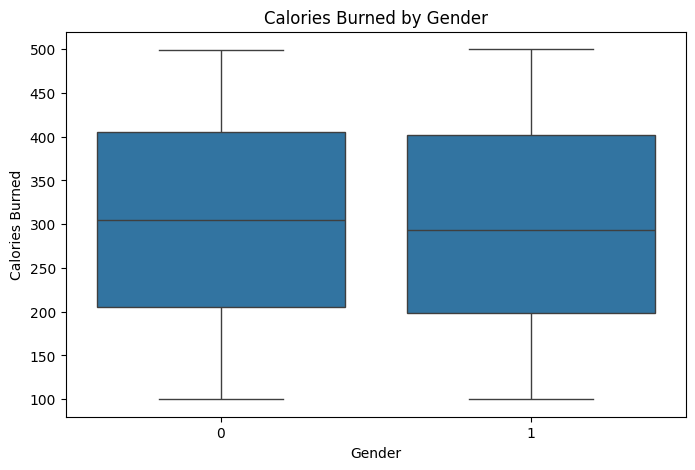

In [ ]:

# Boxplot of Calories Burned by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Calories Burn', data=df)
plt.title('Calories Burned by Gender')
plt.xlabel('Gender')
plt.ylabel('Calories Burned')
plt.savefig('eda_boxplot_gender.png')
plt.show()

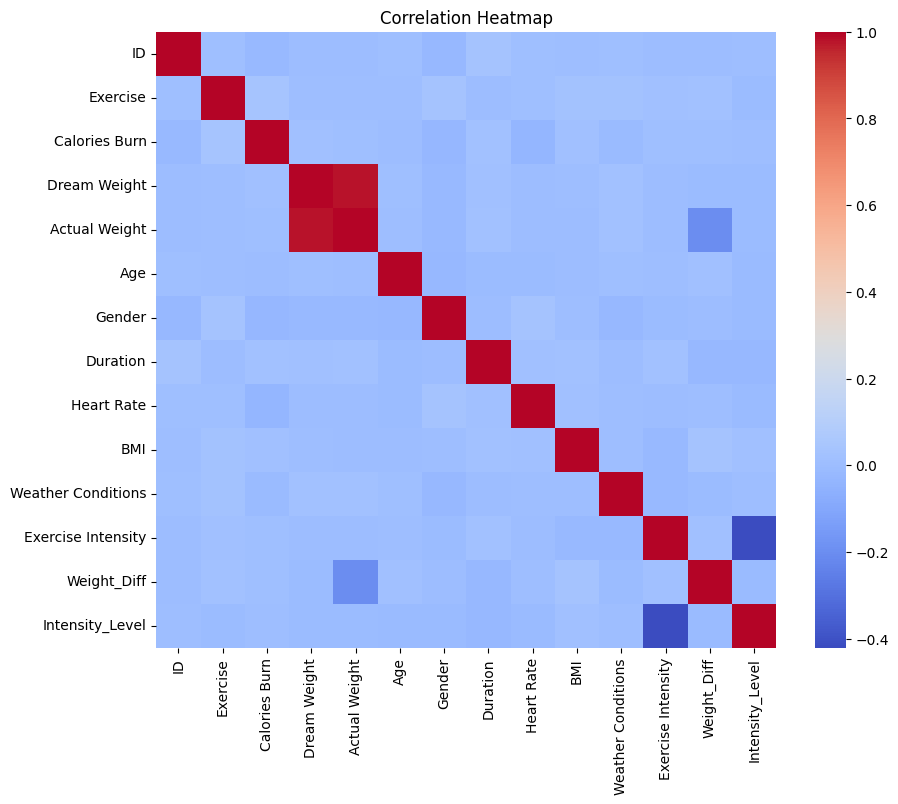

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap (numeric features only)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('eda_correlation_heatmap.png')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# ------------------ Regression Analysis ------------------

# Features and target for regression
X_reg = df[['Duration', 'Heart Rate', 'BMI', 'Age', 'Gender', 'Exercise', 'Exercise Intensity', 'Weather Conditions']]
y_reg = df['Calories Burn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Regression Model Evaluation:")
print(f"R-squared (R2): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Regression Model Evaluation:
R-squared (R2): -0.0480
Mean Squared Error (MSE): 13861.8016
Root Mean Squared Error (RMSE): 117.7362


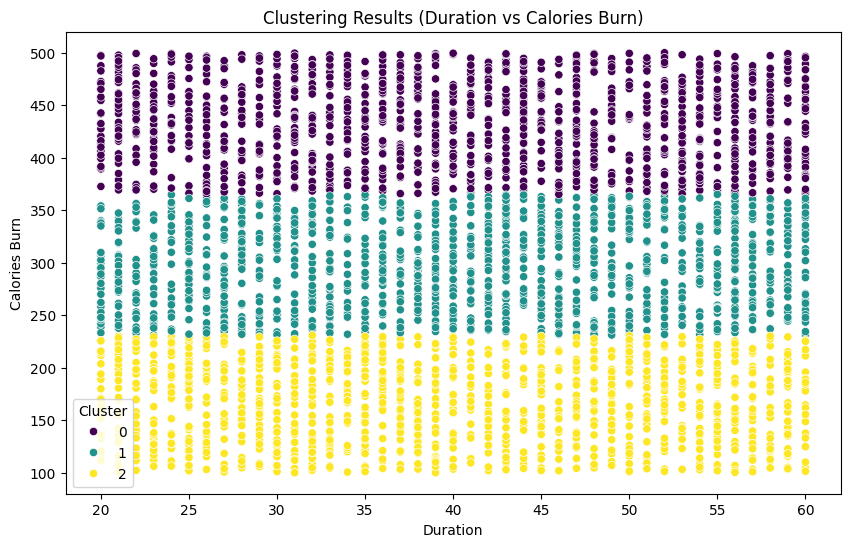

In [ ]:
from sklearn.cluster import KMeans

# ------------------ Clustering Analysis ------------------

# Features for clustering
X_cluster = df[['Duration', 'Heart Rate', 'BMI', 'Exercise Intensity', 'Calories Burn']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)


import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the clusters (example using two features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Calories Burn', hue='Cluster', data=df, palette='viridis')
plt.title('Clustering Results (Duration vs Calories Burn)')
plt.xlabel('Duration')
plt.ylabel('Calories Burn')
plt.show()

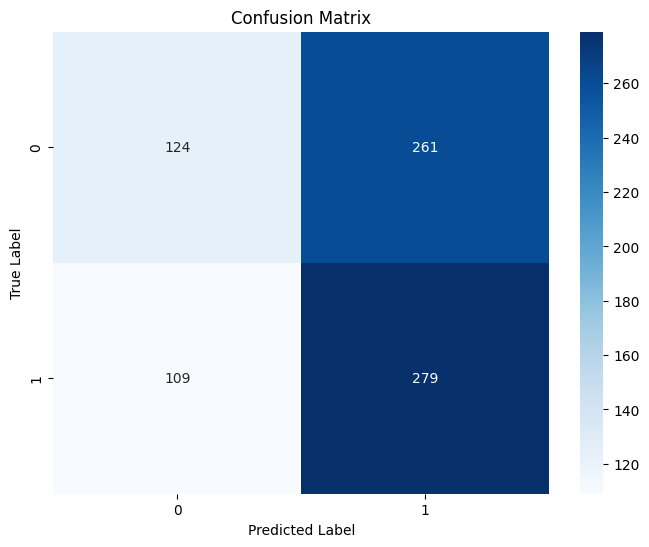

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# ------------------ Classification Analysis ------------------

# Create binary target: Goal Met (Weight_Diff <= 0)
df['Goal_Met'] = (df['Weight_Diff'] <= 0).astype(int)

# Features and target for classification
X_clf = df[['Duration', 'Heart Rate', 'BMI', 'Age', 'Gender', 'Exercise', 'Exercise Intensity', 'Weather Conditions']]
y_clf = df['Goal_Met']

# Train-test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_clf, y_train_clf)
y_pred_clf = log_model.predict(X_test_clf)

# Evaluation
accuracy = accuracy_score(y_test_clf, y_pred_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

# Save model evaluation summary
with open("model_evaluation.txt", "w") as f:
    f.write(f"Regression R² Score: {r2:.4f}\n")
    f.write(f"Regression RMSE: {rmse:.4f}\n")
    f.write(f"Classification Accuracy: {accuracy:.4f}\n")
    f.write("Confusion Matrix:\n")
    f.write(str(conf_matrix))

    import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# ---------------- Regression ----------------
X_reg = df[['Duration', 'Heart Rate', 'BMI', 'Age', 'Gender', 'Exercise', 'Exercise Intensity', 'Weather Conditions']]
y_reg = df['Calories Burn']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = rf_reg.predict(X_test_reg)

r2 = r2_score(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)

# Feature importance
importances = rf_reg.feature_importances_
importance_df = pd.DataFrame({'Feature': X_reg.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# ---------------- Classification ----------------
X_clf = X_reg.copy()
y_clf = df['Goal_Met']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train_clf, y_train_clf)
y_pred_clf = log_clf.predict(X_test_clf)

accuracy = accuracy_score(y_test_clf, y_pred_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

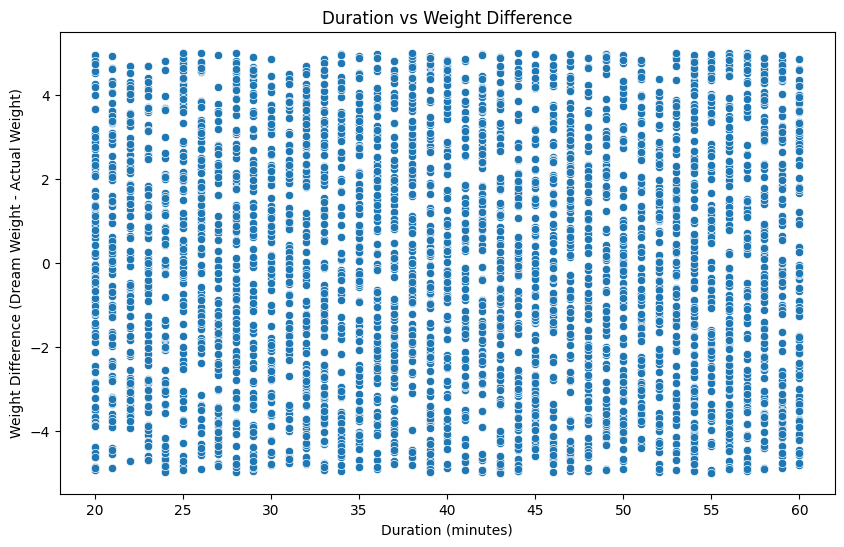

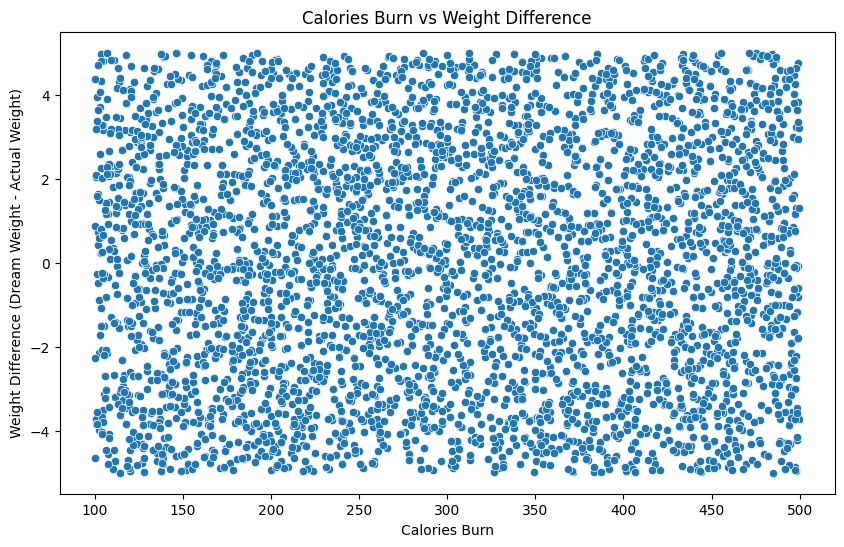

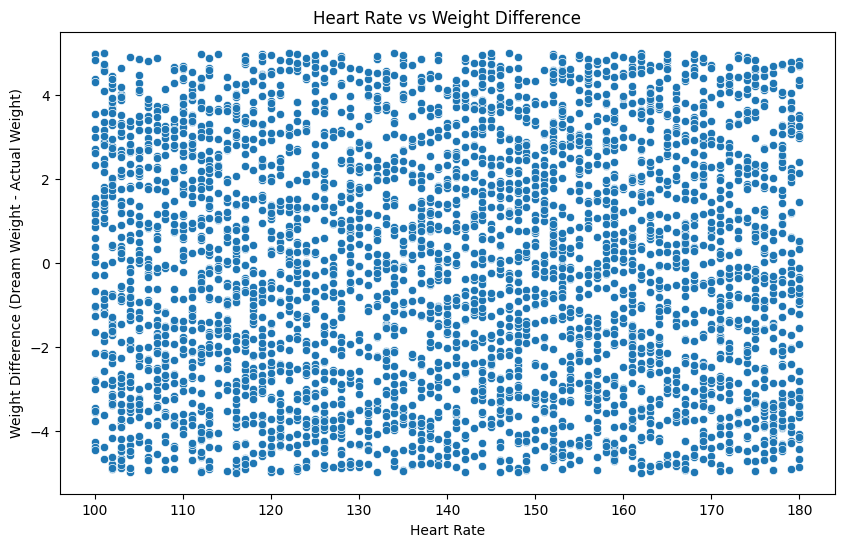

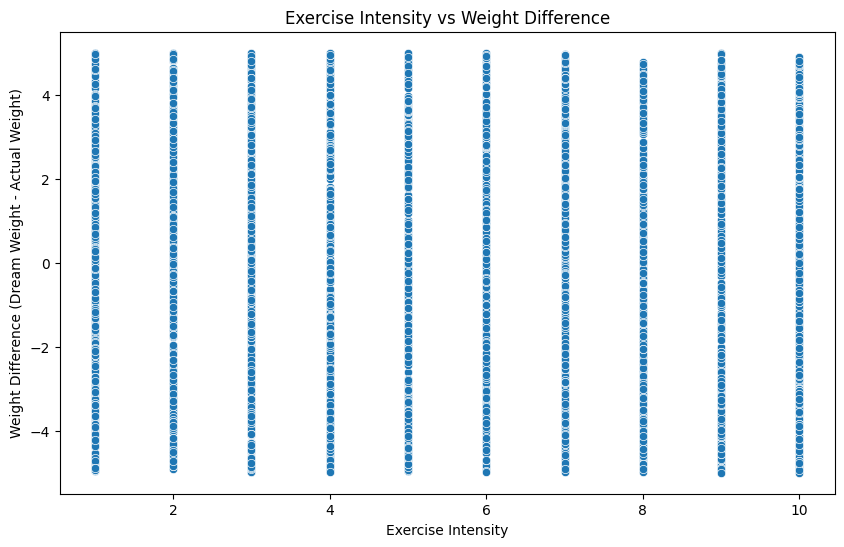

In [ ]:
# Scatter plot: Duration vs Weight_Diff
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Weight_Diff', data=df)
plt.title('Duration vs Weight Difference')
plt.xlabel('Duration (minutes)')
plt.ylabel('Weight Difference (Dream Weight - Actual Weight)')
plt.show()

# Scatter plot: Calories Burn vs Weight_Diff
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Calories Burn', y='Weight_Diff', data=df)
plt.title('Calories Burn vs Weight Difference')
plt.xlabel('Calories Burn')
plt.ylabel('Weight Difference (Dream Weight - Actual Weight)')
plt.show()

# Scatter plot: Heart Rate vs Weight_Diff
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heart Rate', y='Weight_Diff', data=df)
plt.title('Heart Rate vs Weight Difference')
plt.xlabel('Heart Rate')
plt.ylabel('Weight Difference (Dream Weight - Actual Weight)')
plt.show()

# Scatter plot: Exercise Intensity vs Weight_Diff
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Exercise Intensity', y='Weight_Diff', data=df)
plt.title('Exercise Intensity vs Weight Difference')
plt.xlabel('Exercise Intensity')
plt.ylabel('Weight Difference (Dream Weight - Actual Weight)')
plt.show()

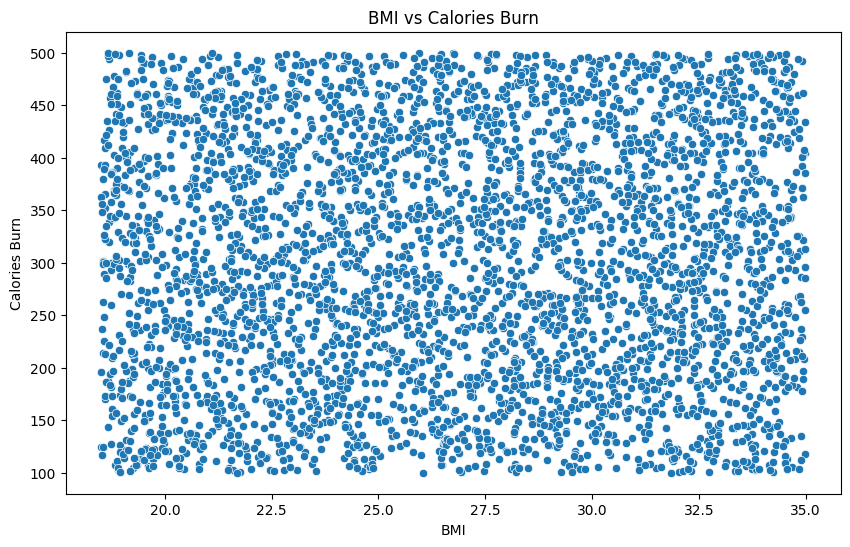

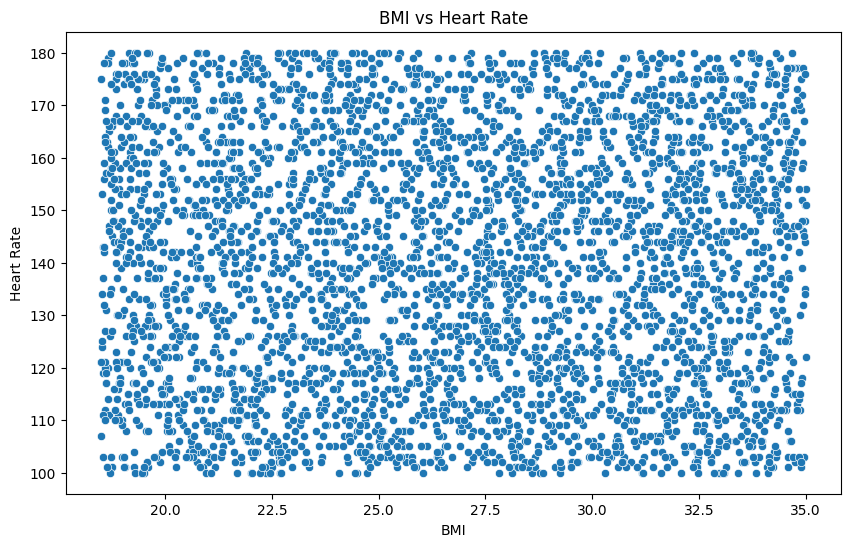

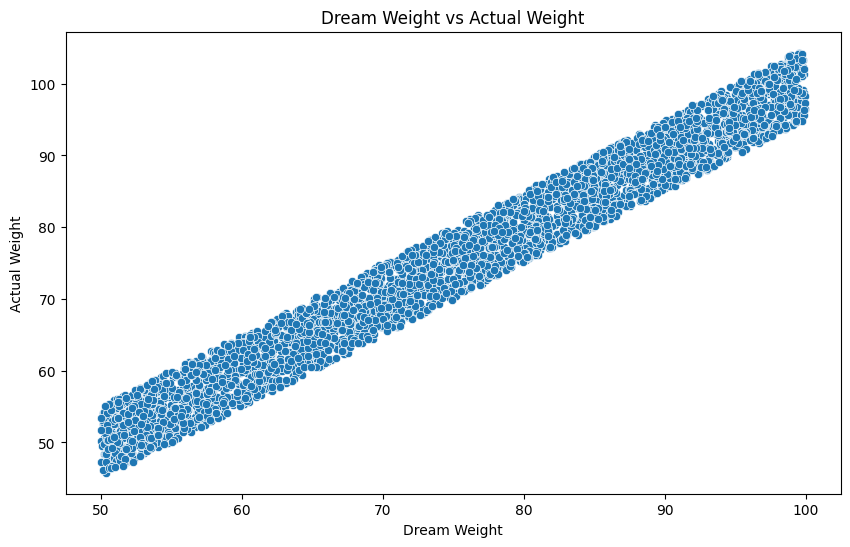

In [ ]:
# Scatter plot: BMI vs Calories Burn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Calories Burn', data=df)
plt.title('BMI vs Calories Burn')
plt.xlabel('BMI')
plt.ylabel('Calories Burn')
plt.show()

# Scatter plot: BMI vs Heart Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Heart Rate', data=df)
plt.title('BMI vs Heart Rate')
plt.xlabel('BMI')
plt.ylabel('Heart Rate')
plt.show()

# Scatter plot: Dream Weight vs Actual Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dream Weight', y='Actual Weight', data=df)
plt.title('Dream Weight vs Actual Weight')
plt.xlabel('Dream Weight')
plt.ylabel('Actual Weight')
plt.show()

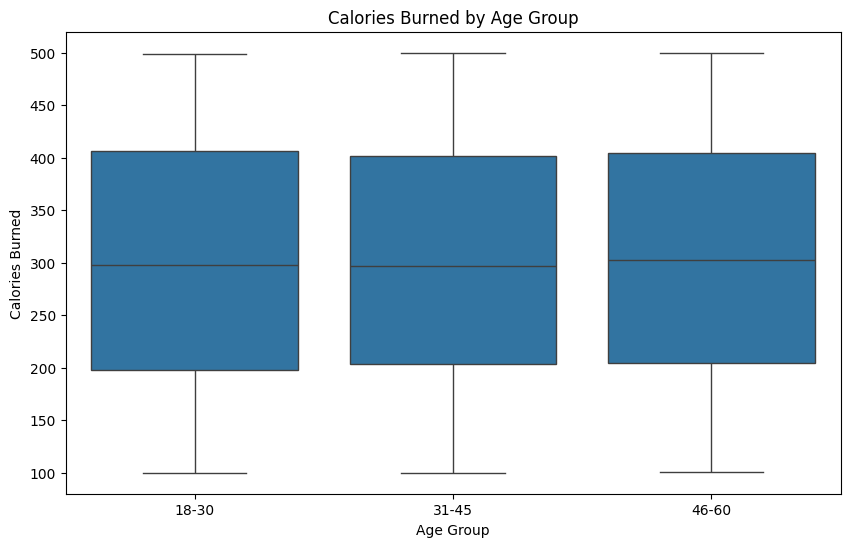

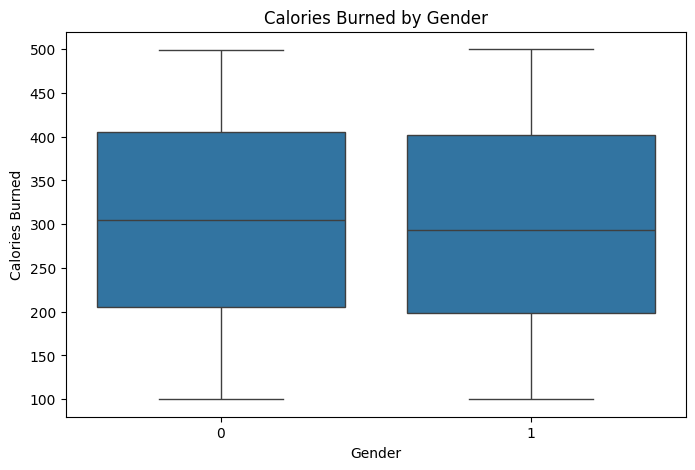

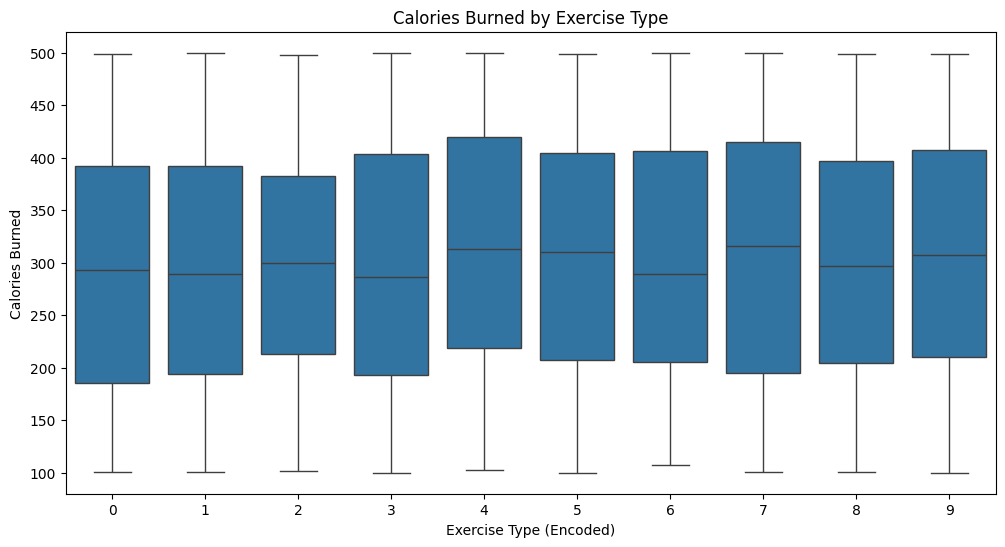

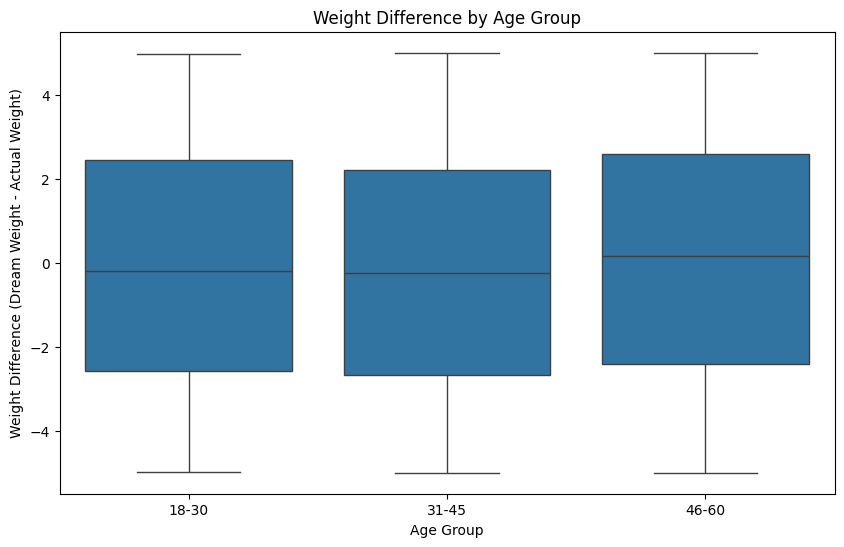

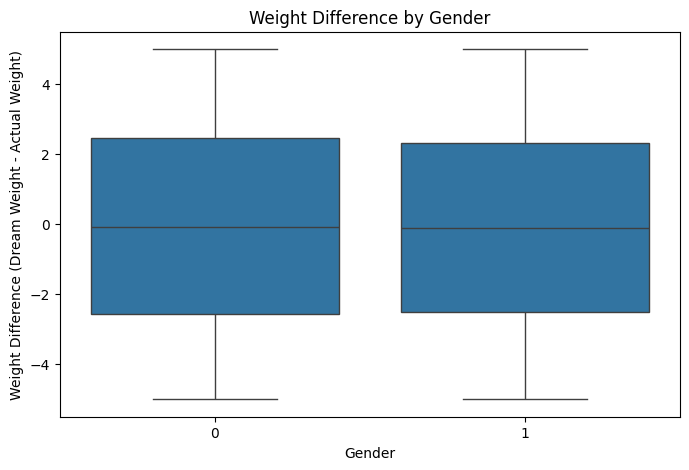

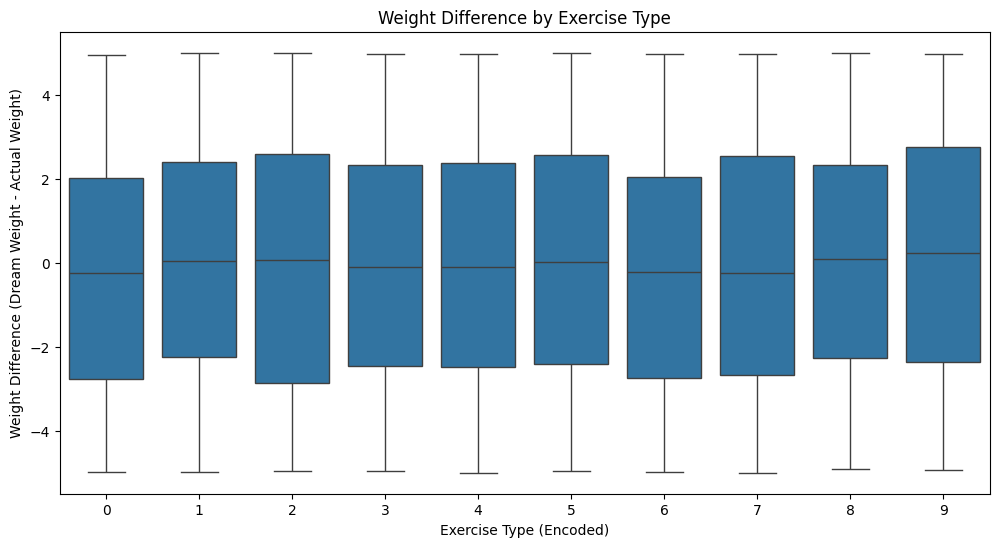

In [ ]:
# Re-create Age Groups
df['Age_Group'] = pd.cut(df['Age'], bins=[17, 30, 45, 60], labels=['18-30', '31-45', '46-60'])

# Box plot of Calories Burn by Age_Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Calories Burn', data=df)
plt.title('Calories Burned by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Calories Burned')
plt.show()

# Box plot of Calories Burn by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Calories Burn', data=df)
plt.title('Calories Burned by Gender')
plt.xlabel('Gender')
plt.ylabel('Calories Burned')
plt.show()

# Box plot of Calories Burn by Exercise
plt.figure(figsize=(12, 6))
sns.boxplot(x='Exercise', y='Calories Burn', data=df)
plt.title('Calories Burned by Exercise Type')
plt.xlabel('Exercise Type (Encoded)')
plt.ylabel('Calories Burned')
plt.show()

# Box plot of Weight_Diff by Age_Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Weight_Diff', data=df)
plt.title('Weight Difference by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Weight Difference (Dream Weight - Actual Weight)')
plt.show()

# Box plot of Weight_Diff by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Weight_Diff', data=df)
plt.title('Weight Difference by Gender')
plt.xlabel('Gender')
plt.ylabel('Weight Difference (Dream Weight - Actual Weight)')
plt.show()

# Box plot of Weight_Diff by Exercise
plt.figure(figsize=(12, 6))
sns.boxplot(x='Exercise', y='Weight_Diff', data=df)
plt.title('Weight Difference by Exercise Type')
plt.xlabel('Exercise Type (Encoded)')
plt.ylabel('Weight Difference (Dream Weight - Actual Weight)')
plt.show()